# Análise de COVID no mundo.

A pandemia de COVID-19, também conhecida como pandemia de coronavírus, foi uma pandemia da doença por coronavírus (COVID-19), causando síndrome respiratória aguda grave 2 (SARS-CoV-2). O vírus foi identificado pela primeira vez a partir de um surto em Wuhan, China, em dezembro de 2019. As tentativas de contê-lo falharam, permitindo que o vírus se espalhasse para outras áreas da China e, posteriormente, para todo o mundo. Em 30 de janeiro de 2020, a Organização Mundial da Saúde (OMS) classificou o surto como Emergência de Saúde Pública de Âmbito Internacional (PHEIC) e, em 11 de março de 2020, como pandemia. A OMS declarou o fim da PHEIC no dia 5 de maio de 2023, apesar de ainda continuar a se referir a ela como uma pandemia. Até 14 de abril de 2024, conforme a OMS, 775.335.902 milhões de casos foram confirmados em 231 países e territórios, com 7.045.569 milhões de mortes atribuídas à doença, tornando-se a quinta mais mortal da história.

#### Vamos análisar esses números de casos e mortes, com gráficos para comparativo entre alguns países.

- Vamos começar importanto algumas bibliotecas que nos ajudam na análise de dados.

In [ ]:
import pandas as pd
import numpy as np

In [2]:
covid = pd.read_csv('owid-covid-data.csv')
covid.head() #= covid.sample(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(covid, title='Covid',
                 #html={'style': {'full_width': True}})
#profile.to_file('Covid.html')

In [4]:
covid.shape

(387302, 67)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387302 entries, 0 to 387301
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387302 non-null  object 
 1   continent                                   368758 non-null  object 
 2   location                                    387302 non-null  object 
 3   date                                        387302 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

- Após uma análise superficial dos dados, podemos ver que a base de dados possui 387302 linhas e 67 colunas.
- Vemos que a coluna 'date' que representa as datas, está com o tipo de seus dados errados, está como 'object'(objeto/texto) ao invés de data.

Vamos fazer os tratamentos necessários dos dados.

- Corrigir o tipo de dados da coluna 'date'.

In [6]:
from dateutil.parser import parse

In [7]:
covid['date'] = covid['date'].apply(parse)

- Com essa correção feita, agora vamos olhar para os valores nulos ou ausentes.

In [8]:
(covid.isnull().sum()/covid.shape[0]).sort_values(ascending=False)

weekly_icu_admissions_per_million          0.972399
weekly_icu_admissions                      0.972399
excess_mortality_cumulative_per_million    0.965952
excess_mortality                           0.965952
excess_mortality_cumulative                0.965952
                                             ...   
new_deaths_per_million                     0.027661
population                                 0.000000
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

- Analisando os dados faltantes, podemos ver que há colunas em quase sua totalidade de valores nulos.
- O tratamento que escolhi é de, excluir essas colunas, já que não acrescentam em nada para nossa análise.

In [9]:
covid.columns[covid.isnull().sum()>340000]

Index(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
      dtype='object')

In [10]:
covid.drop(['icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], axis=1, inplace=True)

- Com o tratamento feito, vamos 'separar' a base de dados para a data mais atual e fazer as análises propostas.

In [11]:
covid['date'].tail()

387297   2024-03-13
387298   2024-03-14
387299   2024-03-15
387300   2024-03-16
387301   2024-03-17
Name: date, dtype: datetime64[ns]

In [12]:
covid_atual = covid[covid['date']=='2024-03-17']
covid_atual.reset_index(drop=True,inplace=True)
covid_atual

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2024-03-17,232403.0,185.0,26.429,7982.0,0.0,0.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,4.112877e+07
1,OWID_AFR,NaN,Africa,2024-03-17,13139831.0,138.0,19.714,259095.0,1.0,0.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.426737e+09
2,ALB,Europe,Albania,2024-03-17,334863.0,0.0,0.000,3605.0,0.0,0.000,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,2.842318e+06
3,DZA,Africa,Algeria,2024-03-17,272010.0,0.0,0.000,6881.0,0.0,0.000,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,4.490323e+07
4,ASM,Oceania,American Samoa,2024-03-17,8359.0,0.0,0.000,34.0,0.0,0.000,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,4.429500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,WLF,Oceania,Wallis and Futuna,2024-03-17,3550.0,0.0,0.000,8.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,1.159600e+04
243,OWID_WRL,NaN,World,2024-03-17,774954379.0,52836.0,7548.000,7040264.0,962.0,137.429,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,7.975105e+09
244,YEM,Asia,Yemen,2024-03-17,11945.0,0.0,0.000,2159.0,0.0,0.000,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,3.369661e+07
245,ZMB,Africa,Zambia,2024-03-17,349404.0,100.0,14.286,4069.0,0.0,0.000,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,2.001767e+07


- Ordenando a base de dados para exibir em ordem decrescente o total de casos de covid.

In [13]:
covid_atual.sort_values(by='total_cases',ascending=False).head(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
243,OWID_WRL,NaN,World,2024-03-17,774954379.0,52836.0,7548.000,7040264.0,962.0,137.429,...,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,0.737,7.975105e+09
95,OWID_HIC,NaN,High income,2024-03-17,428366918.0,19981.0,2854.429,2980286.0,855.0,122.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250515e+09
12,OWID_ASI,NaN,Asia,2024-03-17,301381380.0,6242.0,891.714,1636814.0,15.0,2.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.721383e+09
69,OWID_EUR,NaN,Europe,2024-03-17,252376812.0,29633.0,4233.286,2099276.0,122.0,17.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.448078e+08
235,OWID_UMC,NaN,Upper middle income,2024-03-17,245529308.0,30701.0,4385.857,2666619.0,94.0,13.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.525921e+09
70,OWID_EUN,NaN,European Union,2024-03-17,185596049.0,3440.0,491.429,1260605.0,38.0,5.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.501468e+08
160,OWID_NAM,NaN,North America,2024-03-17,124525104.0,1137.0,162.429,1659943.0,763.0,109.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.003237e+08
233,USA,North America,United States,2024-03-17,103436829.0,NaN,NaN,1182424.0,758.0,108.286,...,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926,3.382899e+08
44,CHN,Asia,China,2024-03-17,99343195.0,3426.0,489.429,122046.0,0.0,0.000,...,0.7,261.899,9.74,1.900,48.400,NaN,4.340,76.91,0.761,1.425887e+09
127,OWID_LMC,NaN,Lower middle income,2024-03-17,97517992.0,1863.0,266.143,1341352.0,13.0,1.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.432097e+09


In [43]:
covid_atual.rename(columns={'location':'country'},inplace=True)

- Vamos criar uma tabela com os maiores valores de casos de COVID e depois separar os países com mais casos.

In [15]:
total_casos = covid_atual.groupby('country').agg(total_de_casos=('total_cases', max)).reset_index()
total_casos.sort_values(by='total_de_casos',ascending=False).head(15)

C:\Users\pfagu\AppData\Local\Temp\ipykernel_8688\8179694.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  total_casos = covid_atual.groupby('country').agg(total_de_casos=('total_cases', max)).reset_index()


,country,total_de_casos
243,World,774954379.0
95,High income,428366918.0
12,Asia,301381380.0
69,Europe,252376812.0
235,Upper middle income,245529308.0
70,European Union,185596049.0
160,North America,124525104.0
233,United States,103436829.0
44,China,99343195.0
127,Lower middle income,97517992.0


In [16]:
maiores_casos = total_casos.query('country=="United States" or country=="China" or country=="India" or country=="France" or country=="Germany" or country=="Brazil"')
maiores_casos_1 = maiores_casos.sort_values(by='total_de_casos', ascending=False)
maiores_casos_1.reset_index(drop=True, inplace=True)
maiores_casos_1

,country,total_de_casos
0,United States,103436829.0
1,China,99343195.0
2,India,45032655.0
3,France,38997490.0
4,Germany,38437756.0
5,Brazil,37519960.0


- Inicialmente eu iria separar somente os 5 países com mais casos, mas para incluir o Brasil, eu separei 6.

## Análisando graficamente os dados.

Agora vamos para a parte gáfica das análises, onde eu fiz um ranking de maiores casos e depois comparei com o mundo.

- Importando as principais bibliotecas para exibição gráfica no python.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

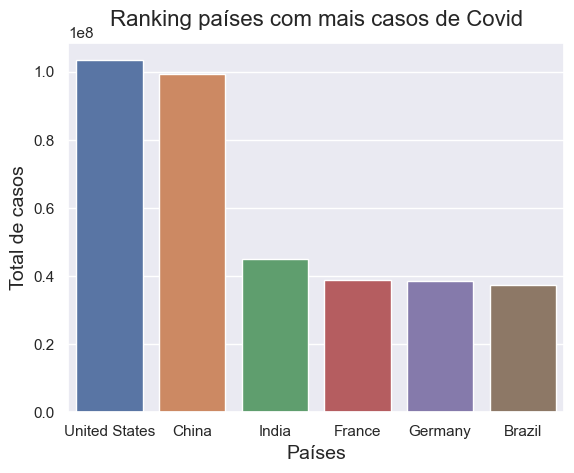

In [18]:
sns.barplot(maiores_casos_1,x='country',y='total_de_casos',ci=None),
plt.title('Ranking países com mais casos de Covid',pad=12,fontdict={'fontsize':16})
plt.xlabel('Países',fontdict={'fontsize':14})
plt.ylabel('Total de casos',fontdict={'fontsize':14})
plt.show()

- Vemos que os EUA e China tem um número muito maior de casos comparada aos outros países.
- Obviamente se deve a esses países possuirem uma população muito grande e a China ser o país onde começou a Covid.
- Mas um caso em particular é a India que recentemente se tornou o país mais populoso do mundo e não tem um número de casos tão alto quanto os EUA.

Vamos análisar o crescimento de casos ao longo do tempo.

In [19]:
covid_1 = covid.query('location=="United States" or location=="China" or location=="India" or location=="France" or location=="Germany" or location=="Brazil"')

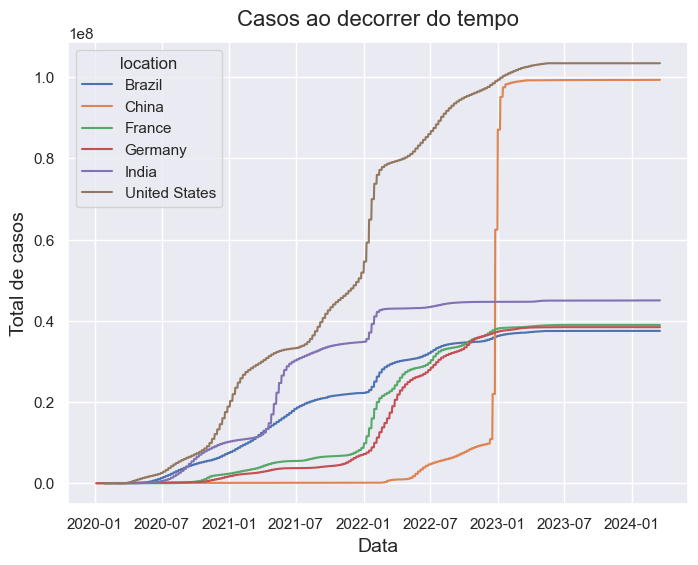

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
figure = sns.lineplot(covid_1,x='date',y='total_cases',hue='location'),
plt.title('Casos ao decorrer do tempo',pad=12,fontdict={'fontsize':16})
plt.xlabel('Data',fontdict={'fontsize':14})
plt.ylabel('Total de casos',fontdict={'fontsize':14})
plt.show()

- Vemos um 'boom' de crescimento de casos nos EUA e China em um certo período, o que pode justificar o gráfico anterior.

In [21]:
covid_line = covid.query('location=="United States" or location=="China" or location=="India" or location=="France" or location=="Germany" or location=="Brazil"')
covid_line.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
46056,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
46057,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
46058,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
46059,BRA,South America,Brazil,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0
46060,BRA,South America,Brazil,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,215313504.0


In [22]:
covid_line_ = covid_line.query('date <= "2021-05"')

In [23]:
print(covid[(covid['location']=='China') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].max() - covid[(covid['location']=='China') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].min())

12147580.0


In [24]:
print(covid[(covid['location']=='Brazil') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].max() - covid[(covid['location']=='Brazil') & (covid['date'] >= '2023-01') & (covid['date'] <= '2023-04') ]['total_cases'].min())

873396.0


- Uma breve exibição desse 'boom' de casos da China em um curto período em comparação com o Brasil.

Agora vamos unir os dados anteriores com o número de casos em todo mundo para fazer uma comparação gráfica.

In [25]:
casos_mundo = total_casos[total_casos['country']=='World']
casos_mundo

,country,total_de_casos
243,World,774954379.0


In [26]:
maiores_casos_1 = pd.concat([maiores_casos_1, casos_mundo])
maiores_casos_1.sort_values(by='total_de_casos', ascending=False, inplace=True)
maiores_casos_1.reset_index(drop=True, inplace=True)
maiores_casos_1

,country,total_de_casos
0,World,774954379.0
1,United States,103436829.0
2,China,99343195.0
3,India,45032655.0
4,France,38997490.0
5,Germany,38437756.0
6,Brazil,37519960.0


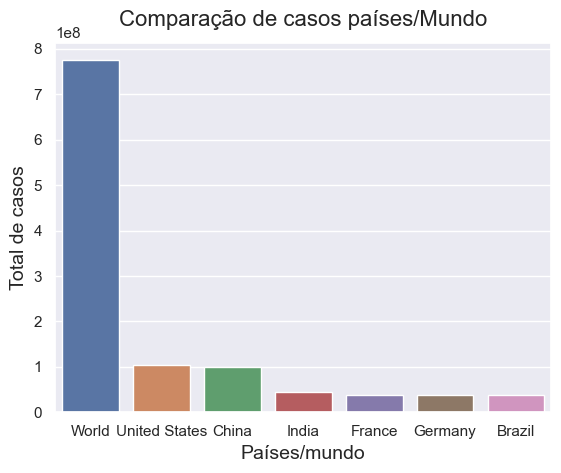

In [27]:
sns.barplot(maiores_casos_1,x='country',y='total_de_casos',ci=None),
plt.title('Comparação de casos países/Mundo',pad=12,fontdict={'fontsize':16})
plt.xlabel('Países/mundo',fontdict={'fontsize':14})
plt.ylabel('Total de casos',fontdict={'fontsize':14})
plt.show()

- Com esse gráfico podemos ver a proporção de casos dos países com o mundo.

Agora faremos uma análise do total de mortes e posteriormente comparar também com o mundo.

- Criando uma tabela de países com maiores números de mortes e exbindo gráficos.

In [29]:
mais_mortes = total_mortes.query('country=="United States" or country=="Brazil" or country=="India" or country=="Russia" or country=="Mexico"')
mais_mortes.sort_values(by='total_de_mortes',ascending=False, inplace=True)
mais_mortes.reset_index(drop=True, inplace=True)
mais_mortes

,country,total_de_mortes
0,United States,1182424.0
1,Brazil,702116.0
2,India,533521.0
3,Russia,402374.0
4,Mexico,334958.0


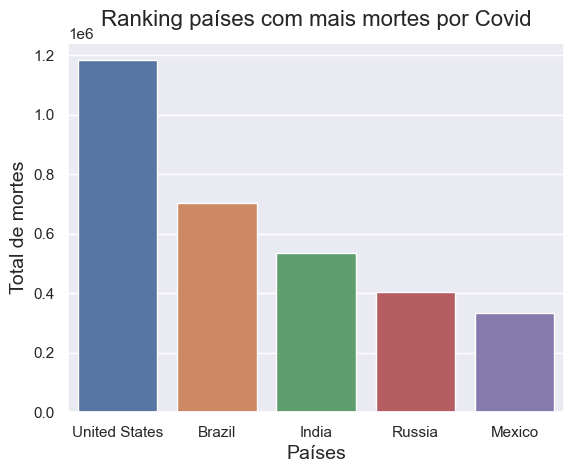

In [30]:
sns.barplot(mais_mortes,x='country',y='total_de_mortes',ci=None),
plt.title('Ranking países com mais mortes por Covid',pad=12,fontdict={'fontsize':16})
plt.xlabel('Países',fontdict={'fontsize':14})
plt.ylabel('Total de mortes',fontdict={'fontsize':14})
plt.show()

- A primeira observação a ser feita é a ausência da China, que possui o segundo lugar em total de casos.
- Podemos observar também a entrada da Russia e México, que não apreciam no ranking de casos.

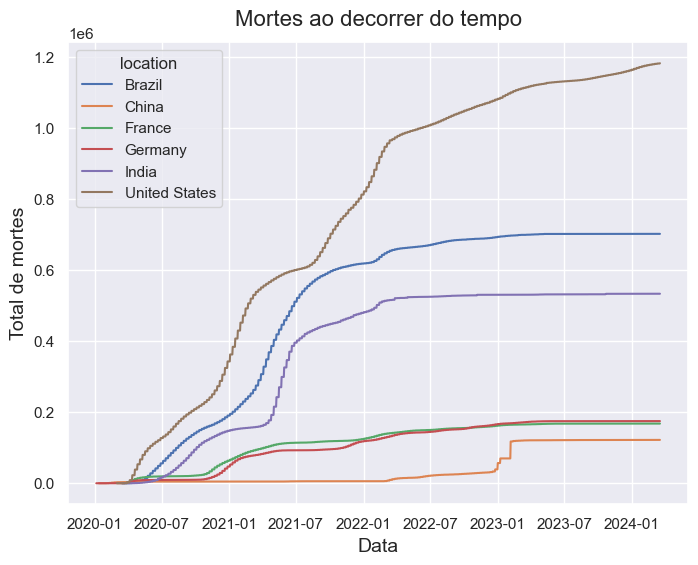

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
figure = sns.lineplot(covid_1,x='date',y='total_deaths',hue='location'),
plt.title('Mortes ao decorrer do tempo',pad=12,fontdict={'fontsize':16})
plt.xlabel('Data',fontdict={'fontsize':14})
plt.ylabel('Total de mortes',fontdict={'fontsize':14})
plt.show()

- Podemos observar um crescimento muito grande ao longo do tempo nos EUA, Brasil e Índia.

In [32]:
mortes_mundo = total_mortes[total_mortes['country']=='World']
mortes_mundo

,country,total_de_mortes
243,World,7040264.0


In [33]:
mortes_mundo = pd.concat([mortes_mundo, mais_mortes])
mortes_mundo.reset_index(drop=True, inplace=True)
mortes_mundo

,country,total_de_mortes
0,World,7040264.0
1,United States,1182424.0
2,Brazil,702116.0
3,India,533521.0
4,Russia,402374.0
5,Mexico,334958.0


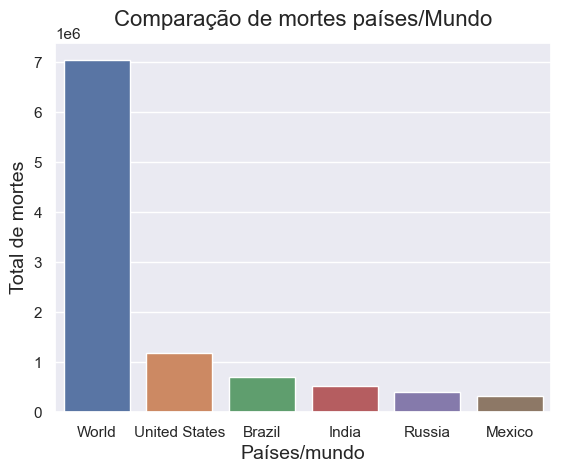

In [34]:
sns.barplot(mortes_mundo,x='country',y='total_de_mortes',ci=None),
plt.title('Comparação de mortes países/Mundo',pad=12,fontdict={'fontsize':16})
plt.xlabel('Países/mundo',fontdict={'fontsize':14})
plt.ylabel('Total de mortes',fontdict={'fontsize':14})
plt.show()

- Agora a proporção das mortes com o mundo.

### América do Sul

Vamos seguir o conceito feito anteriormente de fazer um ranking de casos e mortes entre os países da América do Sul.

- Separando os dados referentes a América do Sul.

In [35]:
covid_america_sul = covid[covid['continent']=='South America']
covid_america_sul = pd.DataFrame(covid_america_sul)
covid_america_sul.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
13806,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13807,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13808,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13809,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0
13810,ARG,South America,Argentina,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,45510324.0


In [36]:
covid_america_sul['location'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru',
       'Suriname', 'Uruguay', 'Venezuela'], dtype=object)

In [37]:
covid_america_sul_atual = covid_america_sul[covid_america_sul['date']=='2024-03-17']
covid_america_sul_atual

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
15343,ARG,South America,Argentina,2024-03-17,10095225.0,1343.0,191.857,130608.0,3.0,0.429,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,45510324.0
41453,BOL,South America,Bolivia,2024-03-17,1198018.0,0.0,0.000,22384.0,0.0,0.000,...,7.1,204.299,6.89,NaN,NaN,25.383,1.10,71.51,0.718,12224114.0
47589,BRA,South America,Brazil,2024-03-17,37519960.0,0.0,0.000,702116.0,0.0,0.000,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
67557,CHL,South America,Chile,2024-03-17,5343520.0,7173.0,1024.714,61769.0,32.0,4.571,...,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,19603736.0
70625,COL,South America,Colombia,2024-03-17,6384097.0,676.0,96.571,142727.0,0.0,0.000,...,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,51874028.0
95197,ECU,South America,Ecuador,2024-03-17,1068532.0,0.0,0.000,36032.0,0.0,0.000,...,3.6,140.448,5.55,2.0,12.3,80.635,1.50,77.01,0.759,18001002.0
113477,FLK,South America,Falkland Islands,2024-03-17,1923.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN,3801.0
119613,GUF,South America,French Guiana,2024-03-17,98041.0,0.0,0.000,413.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.95,NaN,304568.0
145706,GUY,South America,Guyana,2024-03-17,73947.0,0.0,0.000,1300.0,0.0,0.000,...,NaN,373.159,11.62,NaN,NaN,77.159,1.60,69.91,0.682,808727.0
269873,PRY,South America,Paraguay,2024-03-17,735759.0,0.0,0.000,19880.0,0.0,0.000,...,1.7,199.128,8.27,5.0,21.6,79.602,1.30,74.25,0.728,6780745.0


In [38]:
covid_america_sul_atual = covid_america_sul_atual.query('location=="Brazil" or location=="Argentina" or location=="Colombia" or location=="Chile" or location=="Peru"')
covid_america_sul_atual

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
15343,ARG,South America,Argentina,2024-03-17,10095225.0,1343.0,191.857,130608.0,3.0,0.429,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,45510324.0
47589,BRA,South America,Brazil,2024-03-17,37519960.0,0.0,0.000,702116.0,0.0,0.000,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,215313504.0
67557,CHL,South America,Chile,2024-03-17,5343520.0,7173.0,1024.714,61769.0,32.0,4.571,...,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,19603736.0
70625,COL,South America,Colombia,2024-03-17,6384097.0,676.0,96.571,142727.0,0.0,0.000,...,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,51874028.0
271407,PER,South America,Peru,2024-03-17,4524748.0,0.0,0.000,220831.0,0.0,0.000,...,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,34049588.0


In [39]:
casos_america = covid_america_sul_atual.groupby(by='location').agg(casos_america=('total_cases', max))
casos_america.sort_values('casos_america', ascending=False, inplace=True)
casos_america.reset_index(inplace=True)
casos_america

,location,casos_america
0,Brazil,37519960.0
1,Argentina,10095225.0
2,Colombia,6384097.0
3,Chile,5343520.0
4,Peru,4524748.0


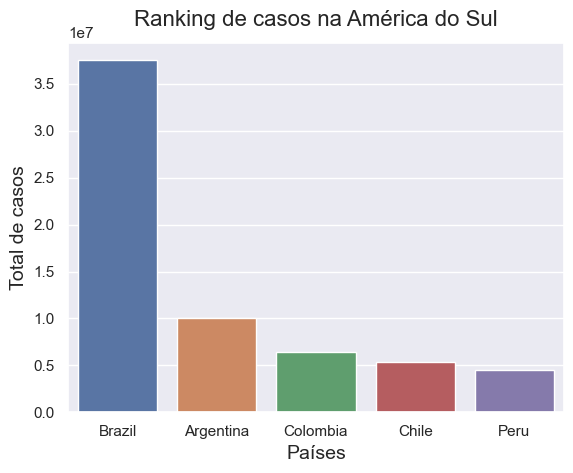

In [40]:
sns.barplot(casos_america,x='location',y='casos_america',ci=None),
plt.title('Ranking de casos na América do Sul',pad=12,fontdict={'fontsize':16})
plt.xlabel('Países',fontdict={'fontsize':14})
plt.ylabel('Total de casos',fontdict={'fontsize':14})
plt.show()

- Observamos um número muito maior de casos no Brasil, o que já era de se esperar lembrando dos gráficos anteriores
 e termos uma população maior em relaçao aos outros países da América do Sul.

Agora o número de mortes.

In [41]:
mortes_america = covid_america_sul_atual.groupby(by='location').agg(mortes_america=('total_deaths', max))
mortes_america.sort_values('mortes_america', ascending=False, inplace=True)
mortes_america.reset_index(inplace=True)
mortes_america

,location,mortes_america
0,Brazil,702116.0
1,Peru,220831.0
2,Colombia,142727.0
3,Argentina,130608.0
4,Chile,61769.0


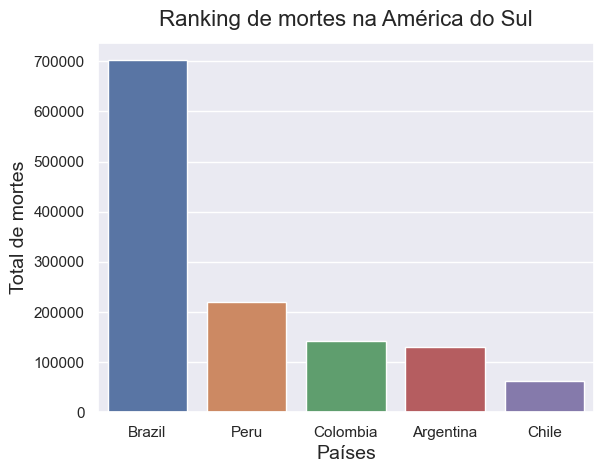

In [42]:
sns.barplot(mortes_america,x='location',y='mortes_america',ci=None),
plt.title('Ranking de mortes na América do Sul',pad=12,fontdict={'fontsize':16})
plt.xlabel('Países',fontdict={'fontsize':14})
plt.ylabel('Total de mortes',fontdict={'fontsize':14})
plt.show()

- De novo, o Brasil aparece como líder no número de mortes.

# Conclusão

- Pudemos observar através do gráficos um comparativo de casos e mortes entre os países.
- Analisamos também os casos e mortes ao longo do tempo.
- Analisamos em separado a América do Sul.

O EUA foi o país que mais se saiu prejudicado, tendo o maior número de casos e mortes, a China como o segundo país com o maior número de casos, mas se quer
aparecendo no ranking de mortes.
E na América do Sul o Brasil dominando todos os rankings, o que já era de se eperar sendo o país mais populoso do continente. 